<a href="https://colab.research.google.com/github/mrcodean/start-python-/blob/main/Medical_Insurance_Premium_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Medical Insurance Premium Prediction with Machine Learning

####Abstract
In this Project we will be developing a model to predict Medical Insurance Premium with Machine Learning. We will be starting with Exploratory data anallysis which is one of  key component to know about the data set. In the model develpoment process we will be using Linear Regression to create machine learning model. Finally we will be evaluvating the model with evaluation matrics.

###Importing Necessary Packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

from scipy import stats

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import warnings
warnings.filterwarnings('ignore')

###Loading the Dataset

In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/INTERNSHIP/Data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##Exploratory Data Analysis

In this EDA process I will also be doing feature engineering which is converting the categorical variable to numerical variable.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are six variables in the data set in which there are 3 categorical data and 4 numerical data.

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the dataset.

###Feature Engineering

In [9]:
df['sex'] = df['sex'].apply(lambda x: 0 if x=='female' else 1)

In [10]:
df['smoker'] = df['smoker'].apply(lambda x: 0 if x=='no' else 1)

In [11]:
df_regdum = pd.get_dummies( df['region'])

In [12]:
df = pd.concat([df, df_regdum], axis = 1)

In [13]:
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,0,0,1


In [14]:
df.drop(['region'], axis = 1, inplace = True)

In [15]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

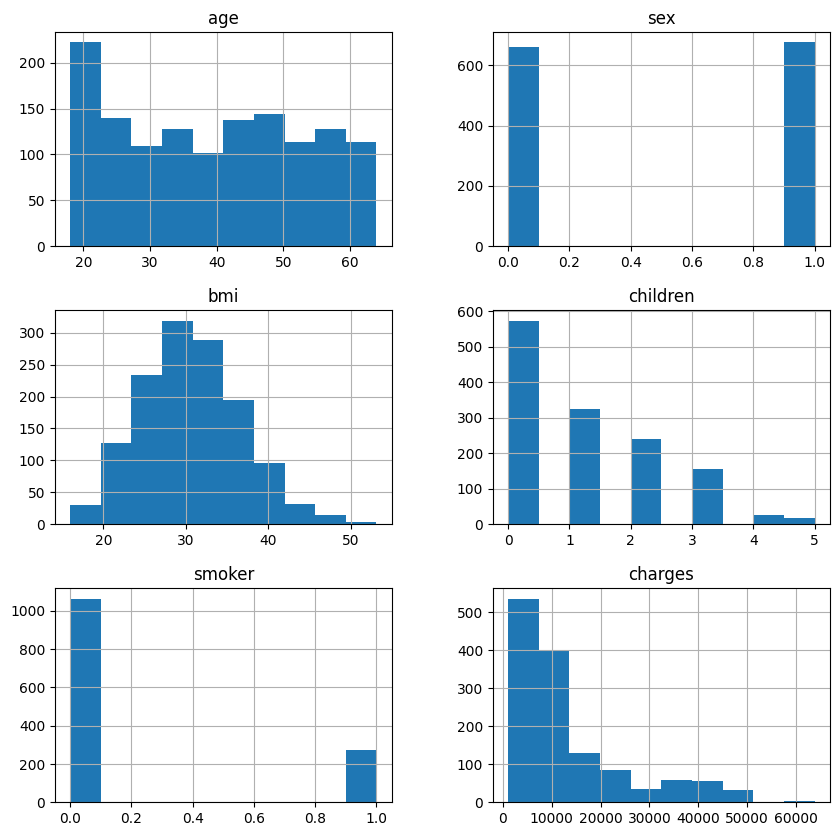

In [18]:
df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(figsize = (10, 10))


According to these histograms;
 1. The age graph show that the individuals whose age is around 20 are having a more no of Insurance.
 2. The sampler which have taken in same for male and female.
 3. The individual with most of bmi is in the range of 25 - 30.
 4. Idividuals who smoke are very less comparing the poeple who don't smoke.
 5. Most of the individuals don't have children in the data.
 6. The charges which are been paid 20000 rs are more.

In [19]:
df.describe()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [20]:
dfc = df.corr()

dfc

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


Text(0.5, 1.0, 'Correlation between Variables')

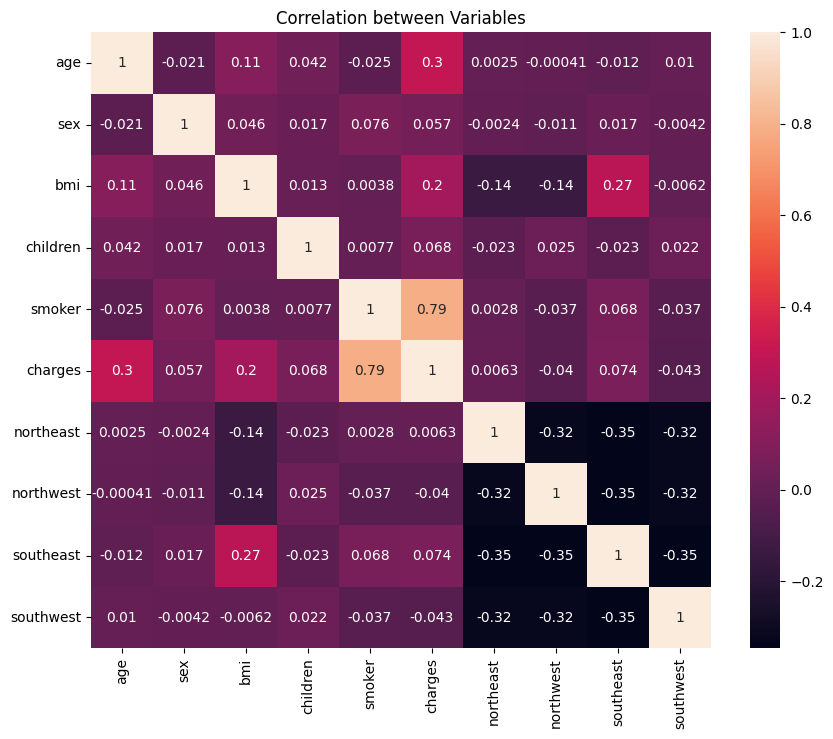

In [23]:
plt.figure(figsize = (10,8))
sns.heatmap(dfc, annot = True)
plt.title('Correlation between Variables')

Most of the variable are having less correlation and negative correlation with charges, however only the smoker variable has a high positive correlation to smoker variables.

## Model Development

###Training and Testing

In [22]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast',
       'northwest', 'southeast', 'southwest']]
x

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [24]:
y = df['charges']

y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [31]:
x_train , x_test , y_train ,y_test = train_test_split(x,y, test_size = 0.3 , random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 9)
(402, 9)
(936,)
(402,)


In [32]:
lm =  LinearRegression()
lm.fit(x_train , y_train)
y_pred = lm.predict(x_test)

print('Coefficient :' , lm.coef_)
print('Intercept :' , lm.intercept_)

print('R Square (training) :' , lm.score(x_train ,y_train))
print('R Square (testing) :' , lm.score(x_test ,y_test))

Coefficient : [  256.43544682   -47.54675517   335.36907276   472.70978916
 23435.99116948   589.02469054    27.12354518  -405.723989
  -210.42424672]
Intercept : -12424.334373420414
R Square (training) : 0.7309569871174701
R Square (testing) : 0.7909160991789905


###Significance Testing

In [39]:
t_stat , p_val = stats.ttest_ind(x , y)

print('T stat :' , t_stat)
print('P value :' , p_val)

T stat : [-39.96528853 -40.08221542 -39.99111667 -40.08043409 -40.08312295
 -40.08301007 -40.08300781 -40.08291977 -40.08300781]
P value : [2.93702659e-274 1.57073400e-275 1.53835655e-274 1.64242287e-275
 1.53542261e-275 1.53977104e-275 1.53985813e-275 1.54325864e-275
 1.53985813e-275]


Findings :
 1. According to T stat and P value the variables and statiscally significat at 1% level.
 2. Sex, southeast and southwest has neagtive relationship with charges.
 3. The model is under fitted according to the r score in train and testing models.
 4. Even when there is no change in independet variables the insurance charges is -12k.
 5. Age adds the charges to 256, Sex reduce the charges to 47, BMI adds the charges to 335, Children add the charges to 472, Smoker adds the charges to 23k, Northeast adds the charges to 589,Northwest adds the charges to 25, Southeast reduces the charges to -405, Southwest reduces the charges to -210.

##Evaluation of Model

Text(0.5, 1.0, 'Distribution of Test and Predicted variables')

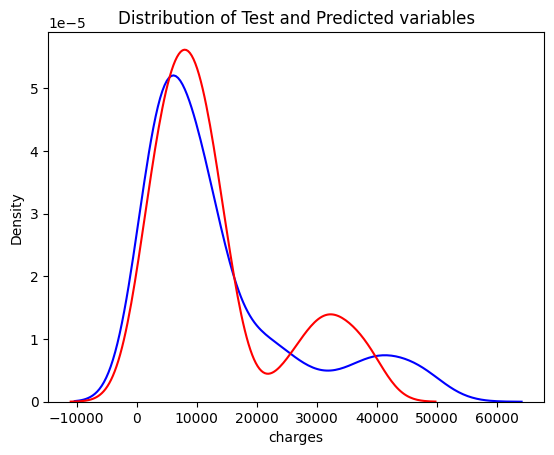

In [33]:
axl = sns.distplot(y_test , hist = False , color = 'b')
sns.distplot(y_pred , hist =  False , color = 'r', ax = axl)
plt.title('Distribution of Test and Predicted variables')

According the above graph we can find that the predicted values red line is not fitting with the blue line test model.

In [35]:
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print('R Square of the model :', r2)
print('Mean Absolute error :',mae)
print('Mean Squared error :',mse)

R Square of the model : 0.7118148586302314
Mean Absolute error : 4011.4496793279864
Mean Squared error : 33342497.826954577


Evaluation Results;
1. The charge explaied by its features is 71%, which is low score to trust the model.
2. The Standard of error and absolute error values are high enough, which make this as an in sufficient model.

##Conclusion

In this project, a machine learning model is developed to predict medical insurance premiums. Exploratory data analysis is conducted to understand the dataset, followed by the use of linear regression for model development. Evaluation metrics are used to assess the model's performance. Findings include age being positively associated with insurance, negative correlations for variables such as sex and region, and under-fitting of the model. The predicted values do not align well with the test model. Evaluation results indicate low explanatory power (71%) and high standard and absolute error values, suggesting an insufficient model. Improvements are required to enhance the model's accuracy.